## Аналитика


Проанализировать влияние возраста на вероятность выживания

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy

%matplotlib inline

In [81]:
df = pd.read_csv('../../../../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA5BC50>]],
      dtype=object)

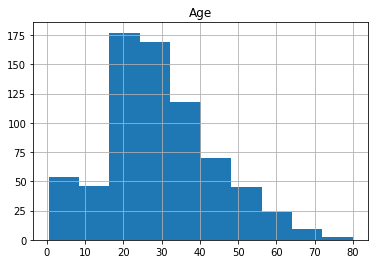

In [82]:
df[["Age"]].hist()

График распределения возраста пасажиров.

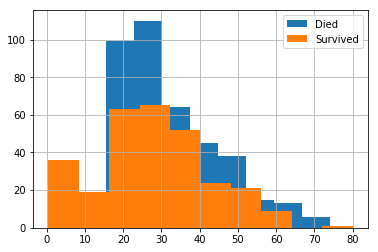

In [83]:
df[df.Survived == 0]["Age"].hist()
df[df.Survived == 1]["Age"].hist()

plt.legend(["Died", "Survived"])

График распределения возраста и выживания.

In [84]:
df = df[["Age","Survived"]]
df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [85]:
groups_by_age = ["Child", "Young", "Middle year", "Old"]
for i in groups_by_age:
    df[i] = 0
df.head()

,Age,Survived,Child,Young,Middle year,Old
0,22.0,0,0,0,0,0
1,38.0,1,0,0,0,0
2,26.0,1,0,0,0,0
3,35.0,1,0,0,0,0
4,35.0,0,0,0,0,0


In [86]:
df.Child = df.Age <= 15
df.Young = (15 < df.Age) &  (df.Age <= 25)
df["Middle year"] = (25 < df.Age) &  (df.Age <= 45)
df.Old = (45 < df.Age)
df.head()

,Age,Survived,Child,Young,Middle year,Old
0,22.0,0,False,True,False,False
1,38.0,1,False,False,True,False
2,26.0,1,False,False,True,False
3,35.0,1,False,False,True,False
4,35.0,0,False,False,True,False


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

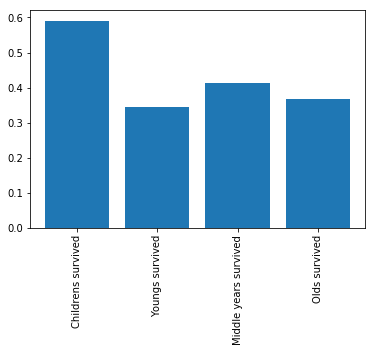

In [120]:
bar_names = ["Childrens survived", "Youngs survived", "Middle years survived", "Olds survived"]
bar_vals = [
    df[df.Child == True][df.Survived==1].Child.count()/df[df.Child == True ].Child.count(),
    df[df.Young == True][df.Survived==1].Young.count()/df[df.Young == True].Young.count(),
    df[df.Survived==1][df["Middle year"] == True].Young.count()/df[df["Middle year"] == True].Young.count(),
    df[df.Survived==1][df.Old == True].Young.count()/df[df.Old == True].Young.count(),
]
plt.bar(bar_names, bar_vals )
plt.xticks(rotation=90)

Исходя из полученых графиков можно сделать вывод, что наибольшим шансом на выживание по возрастным группам обладали дети от 0 до 15 лет.